In [1]:
%matplotlib inline

In [2]:
%run proof_setup

In [3]:
import numpy as np
import sympy as sm

In [4]:
def do_rotation(sinw, cosw, sini, cosi, x, y):
    Rw = sm.Matrix([[cosw, -sinw, 0], [sinw, cosw, 0], [0, 0, 1]])
    Ri = sm.Matrix([[1, 0, 0], [0, cosi, -sini], [0, sini, cosi]])
    v0 = sm.Matrix([[x], [y], [0]])

    v2 = Ri * Rw * v0
    return sm.simplify(v0), sm.simplify(v2)


def get_b2():
    semimajor, ecc, sinw, cosw, sini, cosi, f = sm.symbols(
        "semimajor, ecc, sinw, cosw, sini, cosi, f"
    )

    r = -semimajor * (1 - ecc ** 2) / (1 + ecc * sm.cos(f))
    x = r * sm.cos(f)
    y = r * sm.sin(f)

    v0, v2 = do_rotation(sinw, cosw, sini, cosi, x, y)

    return sm.simplify(v2[0] ** 2 + v2[1] ** 2)


get_b2()

semimajor**2*(ecc**2 - 1)**2*(cosi**2*(cosw*sin(f) + sinw*cos(f))**2 + (cosw*cos(f) - sinw*sin(f))**2)/(ecc*cos(f) + 1)**2

In [5]:
def get_quadratic_eqs(circular=False):
    semimajor, ecc, sinw, cosw, sini, cosi, x, y, L = sm.symbols(
        "semimajor, ecc, sinw, cosw, sini, cosi, x, y, L"
    )

    if circular:
        sinw = 0
        cosw = 1
        ecc = 0

    v0, v2 = do_rotation(sinw, cosw, sini, cosi, x, y)

    print("x2 =", v2[0])
    print("y2 =", v2[1])
    print("z2 =", v2[2])
    print()

    eq1 = sm.poly(
        (v0[0] - semimajor * ecc) ** 2 + v0[1] ** 2 / (1 - ecc ** 2) - semimajor ** 2,
        x,
        y,
    )
    eq2 = sm.poly(v2[0] ** 2 + v2[1] ** 2 - L ** 2, x, y)

    print("a =", sm.simplify(eq1.coeff_monomial(x ** 2)))
    print("b =", sm.simplify(eq1.coeff_monomial(x * y)))
    print("c =", sm.simplify(eq1.coeff_monomial(y ** 2)))
    print("d =", sm.simplify(eq1.coeff_monomial(x)))
    print("e =", sm.simplify(eq1.coeff_monomial(y)))
    print("f =", sm.simplify(eq1.coeff_monomial(1)))
    print()
    print("A =", sm.simplify(eq2.coeff_monomial(x ** 2)))
    print("B =", sm.simplify(eq2.coeff_monomial(x * y)))
    print("C =", sm.simplify(eq2.coeff_monomial(y ** 2)))
    print("D =", sm.simplify(eq2.coeff_monomial(x)))
    print("E =", sm.simplify(eq2.coeff_monomial(y)))
    print("F =", sm.simplify(eq2.coeff_monomial(1)))


get_quadratic_eqs()
print()
print()
get_quadratic_eqs(circular=True)

x2 = cosw*x - sinw*y
y2 = cosi*(cosw*y + sinw*x)
z2 = sini*(cosw*y + sinw*x)

a = 1
b = 0
c = -1/(ecc**2 - 1)
d = -2*ecc*semimajor
e = 0
f = semimajor**2*(ecc**2 - 1)

A = cosi**2*sinw**2 + cosw**2
B = 2*cosw*sinw*(cosi**2 - 1)
C = cosi**2*cosw**2 + sinw**2
D = 0
E = 0
F = -L**2


x2 = x
y2 = cosi*y
z2 = sini*y

a = 1
b = 0
c = 1
d = 0
e = 0
f = -semimajor**2

A = 1
B = 0
C = cosi**2
D = 0
E = 0
F = -L**2


In [6]:
def get_quartic_expr(circular=False):
    a, b, c, d, e, f, g, A, B, C, D, E, F, x = sm.symbols(
        "a, b, c, d, e, f, g, A, B, C, D, E, F, x", real=True
    )

    p0 = c
    p1 = b * x + e
    p2 = a * x ** 2 + d * x + f

    q0 = C
    q1 = B * x + E
    q2 = A * x ** 2 + D * x + F

    quartic = sm.Poly(
        (p0 * q2 - p2 * q0) ** 2 - (p0 * q1 - p1 * q0) * (p1 * q2 - p2 * q1), x
    )

    if circular:
        args = {a: 1, b: 0, c: 1, d: 0, e: 0, f: -1, A: 1, B: 0, D: 0, E: 0}
    else:
        args = {a: 1, b: 0, e: 0, D: 0, E: 0}

    for i in range(5):
        print(
            "a{0} =".format(i), sm.simplify(quartic.coeff_monomial(x ** i).subs(args))
        )


get_quartic_expr()
print()
print()
get_quartic_expr(circular=True)

a0 = C**2*f**2 - 2*C*F*c*f + F**2*c**2
a1 = 2*C*d*(C*f - F*c)
a2 = -2*A*C*c*f + 2*A*F*c**2 + B**2*c*f + C**2*d**2 + 2*C**2*f - 2*C*F*c
a3 = d*(-2*A*C*c + B**2*c + 2*C**2)
a4 = A**2*c**2 - 2*A*C*c + B**2*c + C**2


a0 = C**2 + 2*C*F + F**2
a1 = 0
a2 = -2*C**2 - 2*C*F + 2*C + 2*F
a3 = 0
a4 = C**2 - 2*C + 1


[-0.31402691 -0.15156128  0.27685522  0.57362927]
[-0.24301609667419227, 0.4562350677626085]


AssertionError: 

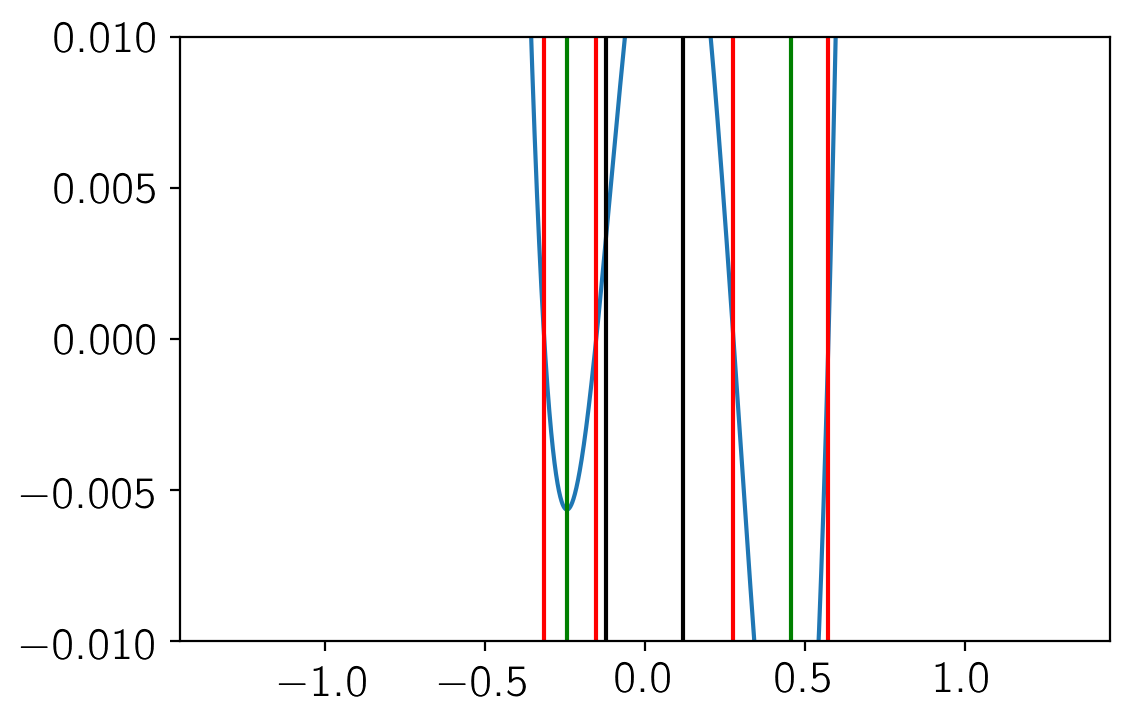

In [63]:
from scipy.optimize import bisect, newton, minimize, fminbound


def find_root(poly, a, b):
    f = lambda x: np.polyval(poly, x)
    sgna = np.sign(f(a))
    sgnb = np.sign(f(b))
    if sgna != sgnb:
        return bisect(f, a, b)
    fp = lambda x: np.polyval(np.polyder(poly), x)
    x = fminbound(f, a, b)
    sgnx = np.sign(f(x))
    return soln


#     return newton(f, 0.5 * (a + b), fprime=fp)


def discriminant(e, d, c, b, a):
    print(8 * a * c - 3 * b ** 2)
    return (
        256 * a ** 3 * e ** 3
        - 192 * a ** 2 * b * d * e ** 2
        - 128 * a ** 2 * c ** 2 * e ** 2
        + 144 * a ** 2 * c * d ** 2 * e
        - 27 * a ** 2 * d ** 4
        + 144 * a * b ** 2 * c * e ** 2
        - 6 * a * b ** 2 * d ** 2 * e
        - 80 * a * b * c ** 2 * d * e
        + 18 * a * b * c * d ** 3
        + 16 * a * c ** 4 * e
        - 4 * a * c ** 3 * d ** 2
        - 27 * b ** 4 * e ** 2
        + 18 * b ** 3 * c * d * e
        - 4 * b ** 3 * d ** 3
        - 4 * b ** 2 * c ** 3 * e
        + b ** 2 * c ** 2 * d ** 2
    )


def find_roots(semimajor, ecc, omega, incl, Ls, tol=1e-6):
    Ls = np.atleast_1d(Ls) / semimajor

    Efactor = np.sqrt((1 - ecc) / (1 + ecc))
    ome2 = 1 - ecc ** 2
    sinw = np.sin(omega)
    cosw = np.cos(omega)
    sin2w = sinw * sinw
    cos2w = cosw * cosw
    sini = np.sin(incl)
    cosi = np.cos(incl)
    cos2i = cosi * cosi

    f0 = 2 * np.arctan2(cosw, 1 + sinw)

    a = 1
    b = 0
    c = 1 / ome2
    d = -2 * ecc
    e = 0
    f = -ome2

    A = cos2i * sin2w + cos2w
    B = 2 * cosw * sinw * (cos2i - 1)
    C = cos2i * cos2w + sin2w
    D = 0
    E = 0

    results = []
    M_results = []
    polys = []
    for L in Ls:
        F = -L * L

        a0 = C ** 2 * f ** 2 - 2 * C * F * c * f + F ** 2 * c ** 2
        a1 = 2 * C * d * (C * f - F * c)
        a2 = (
            -2 * A * C * c * f
            + 2 * A * F * c ** 2
            + B ** 2 * c * f
            + C ** 2 * d ** 2
            + 2 * C ** 2 * f
            - 2 * C * F * c
        )
        a3 = d * (-2 * A * C * c + B ** 2 * c + 2 * C ** 2)
        a4 = A ** 2 * c ** 2 - 2 * A * C * c + B ** 2 * c + C ** 2

        p = [a4, a3, a2, a1, a0]
        polys.append(p)
        poly = np.polynomial.Polynomial(p[::-1])

        comp = np.eye(4, k=-1)
        comp[0, -1] = -a0 / a4
        comp[1, -1] = -a1 / a4
        comp[2, -1] = -a2 / a4
        comp[3, -1] = -a3 / a4
        roots = np.linalg.eigvals(comp)

        f = lambda x: np.polyval(p, x)
        roots2 = [find_root(p, -L * semimajor, 0), find_root(p, 0, L * semimajor)]
        print(roots)
        print(roots2)

        # Only select real roots
        #         roots = np.real(roots[np.abs(np.imag(roots)) < tol])

        x = np.linspace(-1.1 * L * semimajor, 1.1 * L * semimajor, 5000)
        plt.plot(x, np.polyval(polys[-1], x))
        [plt.axvline(r, color="r") for r in roots]
        [plt.axvline(r, color="g") for r in roots2]
        plt.axvline(-L, color="k")
        plt.axvline(L, color="k")
        #         plt.xlim(-L, 0)
        plt.ylim(-0.01, 0.01)
        assert 0

        angles = []
        for x in roots:
            y2 = (1 - (x - ecc) ** 2) * ome2
            if y2 < 0.0:
                continue

            absy = np.sqrt(y2)
            for sgn in [-1, 1]:
                y = sgn * absy
                x2 = cosw * x - sinw * y
                y2 = cosi * (cosw * y + sinw * x)
                z2 = sini * (cosw * y + sinw * x)

                b2 = x2 * x2 + y2 * y2
                if np.abs(b2 - L ** 2) < tol and z2 < 0:
                    angle = np.arctan2(y, x) - np.pi
                    if angle < -np.pi:
                        angle += 2 * np.pi
                    angles.append(angle - f0)

        # Deal with multiple roots
        angles = np.array(angles)
        angles.sort()
        delta = np.append(True, np.diff(angles))
        angles = angles[delta > tol]

        # Wrap the roots properly to span the transit
        if len(angles) == 2:
            if np.all(angles > 0):
                angles = np.array([angles[1] - 2 * np.pi, angles[0]])
            if np.all(angles < 0):
                angles = np.array([angles[1], angles[0] + 2 * np.pi])
        else:
            angles = np.array([-np.pi, np.pi])

        # Convert to mean anomaly
        E = 2 * np.arctan(Efactor * np.tan(0.5 * (angles + f0)))
        M = E - ecc * np.sin(E)

        results.append(angles)
        M_results.append(M)

    return polys, results, M_results


semimajor = 10.0
ecc = 0.6
omega = 0.5
incl = 0.5 * np.pi
L = [1.2, 1.0]
polys, roots, Ms = find_roots(semimajor, ecc, omega, incl, L)

In [33]:
roots[0], 2 * L[0] / semimajor

(array([-0.14181642,  0.13101582]), 0.24)

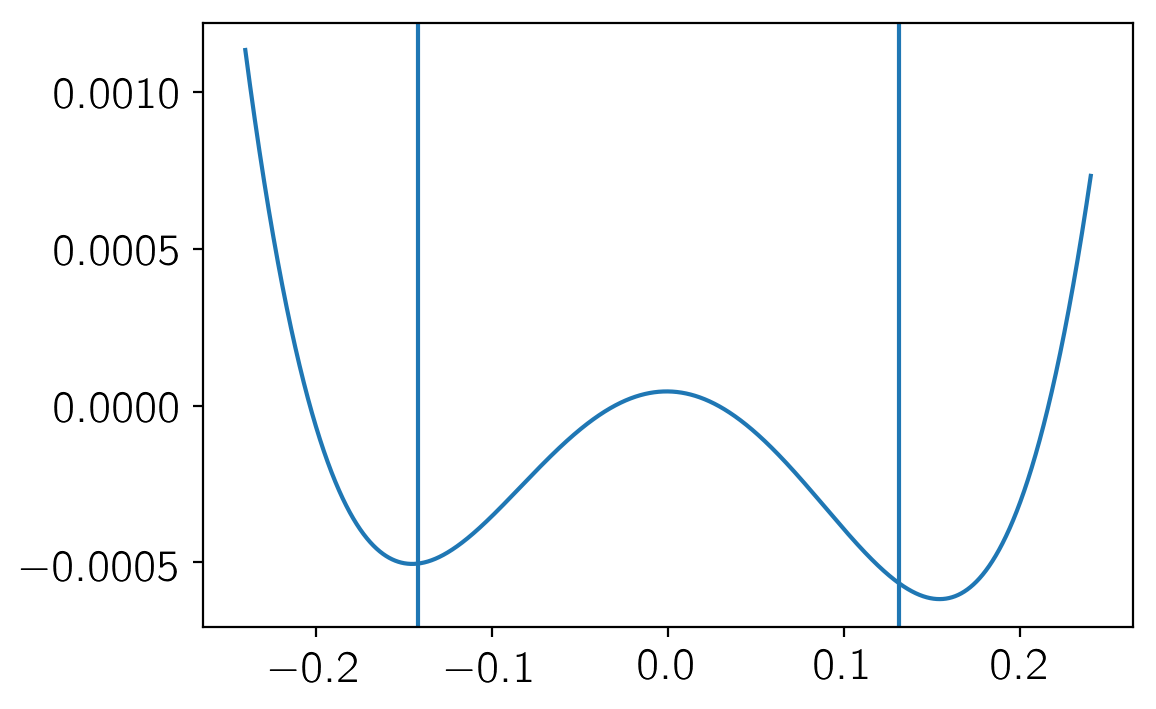

In [ ]:
np.sort(np.array(Ms).flatten()), np.array(
    [0.88452506, 0.8863776, 0.90490204, 0.90675455]
)

In [ ]:
f = np.linspace(-np.pi, np.pi, 10000)

sinw = np.sin(omega)
cosw = np.cos(omega)
sini = np.sin(incl)
cosi = np.cos(incl)
f0 = 2 * np.arctan2(cosw, 1 + sinw)

b2 = (
    lambda f: semimajor ** 2
    * (ecc ** 2 - 1) ** 2
    * (
        cosi ** 2 * (cosw * np.sin(f) + sinw * np.cos(f)) ** 2
        + (cosw * np.cos(f) - sinw * np.sin(f)) ** 2
    )
    / (ecc * np.cos(f) + 1) ** 2
)
b2_old = (
    lambda f: semimajor ** 2
    * (ecc ** 2 - 1) ** 2
    * (np.sin(f - f0) ** 2 + np.cos(f - f0) ** 2 * cosi ** 2)
    / (1 - ecc * np.sin(f - f0 - omega)) ** 2
)

for i in range(len(L)):
    for r in roots[i]:
        print(b2(r + f0))

    plt.plot(f - f0, np.log(np.abs(b2(f) - L[i] ** 2)))
    plt.plot(f - f0, np.log(np.abs(b2_old(f) - L[i] ** 2)), "--")
    [plt.axvline(r, color="k", lw=0.5) for r in roots[i]]

plt.axvline(0, color="k", alpha=0.3, lw=1)
plt.xlim(-0.1, 0.1)

In [ ]:
roots[0].flat[0]